In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/jdariasl/DiplomadoEPM_2019/master/Modulo4/init.py
from init import init; init(force_download=False)

# Application: Colombian electricity spot price


* Modeling and forecasting the hourly electricity spot price plays a crucial role for agents, specially generators and traders, involved in energy day-ahead markets owing to the price may contain relevant information to:

    * Anticipate decisions related with the installed capacity needed to cope with energy demand
    * Minimize investment risks associated to the price volatility
    * Guarantee profits
    * Design contracts at different maturities


* In electricity spot markets the hourly price is determined in a day-ahead blind auction through an Independent System Operator (ISO) trading 24/7 without exceptions in which agents submit their hourly bids and asks for electricity price and physical power delivery in the next day.


* Thereby, the 24 intra-day prices for each day are settled jointly the previous day.


* The data corresponds to the hourly electricity spot price (Colombian Pesos per kilowatt-hour, COP/kWh) of the Colombian Electricity Market from January 1, 2000 (Saturday) to December 31, 2018 (Monday) $\{Y_t,\ t=1,\ldots,T\}$, $T =$ 166560, which is available at XM (http://www.xm.com.co/).

                      price
2000-01-01 00:00:00   46.28
2000-01-01 01:00:00   32.28
2000-01-01 02:00:00   32.28
2000-01-01 03:00:00   32.28
2000-01-01 04:00:00   32.28
2000-01-01 05:00:00   32.28
2000-01-01 06:00:00   32.28
2000-01-01 07:00:00   32.28
2000-01-01 08:00:00   32.28
2000-01-01 09:00:00   32.28
2000-01-01 10:00:00   32.28
2000-01-01 11:00:00   32.28
2000-01-01 12:00:00   32.28
2000-01-01 13:00:00   32.28
2000-01-01 14:00:00   32.28
2000-01-01 15:00:00   32.28
2000-01-01 16:00:00   32.28
2000-01-01 17:00:00   32.28
2000-01-01 18:00:00   32.28
2000-01-01 19:00:00   32.28
2000-01-01 20:00:00   32.28
2000-01-01 21:00:00   32.28
2000-01-01 22:00:00   32.28
2000-01-01 23:00:00   32.28
2000-01-02 00:00:00   32.28
2000-01-02 01:00:00   32.28
2000-01-02 02:00:00   32.28
2000-01-02 03:00:00   32.28
2000-01-02 04:00:00   32.28
2000-01-02 05:00:00   32.28
...                     ...
2018-12-30 18:00:00  353.93
2018-12-30 19:00:00  353.93
2018-12-30 20:00:00  353.93
2018-12-30 21:00:00 

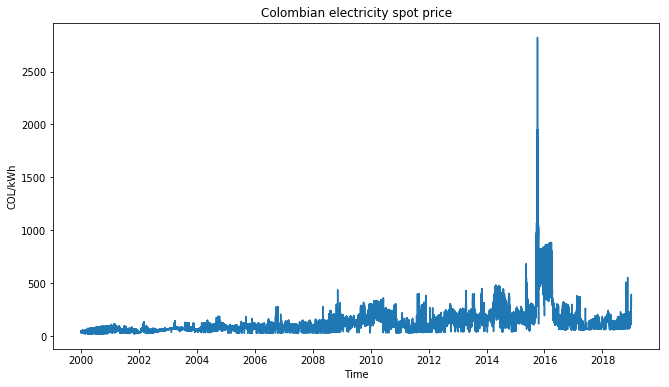

In [24]:
import pandas as pd
import numpy  as np
from matplotlib import pyplot
%matplotlib inline

data_set = pd.read_csv('local/data/price.csv', sep = '\t', squeeze = True)
p = data_set.values
index = pd.date_range('2000-01-01', periods = len(data_set), freq = 'H')
price = pd.DataFrame({'price':p}, index = index)

# also
#start = np.datetime64('2000-01-01T00:00:00')
#end   = np.datetime64('2019-01-01T00:00:00')
#t = np.arange(start, end, dtype = 'datetime64[h]')
#price = pd.DataFrame({'price':p}, index = t)

print(price)

fig, axs= pyplot.subplots(1, 1, figsize=(10.85, 6), sharey=False)
pyplot.plot(price)
pyplot.title('Colombian electricity spot price')
pyplot.ylabel('COL/kWh')
pyplot.xlabel('Time')
pyplot.show()


* Owing to the 24 intra-day structure of electricity spot prices vary substantially across days (Huisman et al., 2007; Liebl, 2013; Weron, 2006), the time series can be splitted into daily datasets, $\{Y_{i,t}, t=1,\ldots,T_i\}$, $i=\mathrm{Mon.},\ldots,\mathrm{Sun.}$, where $T_i$ denotes the number of time data points of the $i$th day.

                      price  year  month  dayofweek  hour
2000-01-01 00:00:00   46.28  2000      1          5     0
2000-01-01 01:00:00   32.28  2000      1          5     1
2000-01-01 02:00:00   32.28  2000      1          5     2
2000-01-01 03:00:00   32.28  2000      1          5     3
2000-01-01 04:00:00   32.28  2000      1          5     4
2000-01-01 05:00:00   32.28  2000      1          5     5
2000-01-01 06:00:00   32.28  2000      1          5     6
2000-01-01 07:00:00   32.28  2000      1          5     7
2000-01-01 08:00:00   32.28  2000      1          5     8
2000-01-01 09:00:00   32.28  2000      1          5     9
2000-01-01 10:00:00   32.28  2000      1          5    10
2000-01-01 11:00:00   32.28  2000      1          5    11
2000-01-01 12:00:00   32.28  2000      1          5    12
2000-01-01 13:00:00   32.28  2000      1          5    13
2000-01-01 14:00:00   32.28  2000      1          5    14
2000-01-01 15:00:00   32.28  2000      1          5    15
2000-01-01 16:

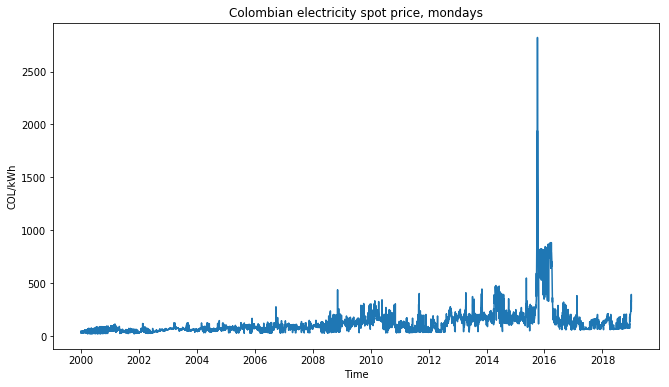

                      price  year  month  dayofweek  hour
2000-01-03 00:00:00   32.28  2000      1          0     0
2000-01-03 01:00:00   32.28  2000      1          0     1
2000-01-03 02:00:00   32.28  2000      1          0     2
2000-01-03 03:00:00   32.28  2000      1          0     3
2000-01-03 04:00:00   32.28  2000      1          0     4
2000-01-03 05:00:00   32.28  2000      1          0     5
2000-01-03 06:00:00   32.28  2000      1          0     6
2000-01-03 07:00:00   32.28  2000      1          0     7
2000-01-03 08:00:00   32.28  2000      1          0     8
2000-01-03 09:00:00   32.28  2000      1          0     9
2000-01-03 10:00:00   47.98  2000      1          0    10
2000-01-03 11:00:00   50.28  2000      1          0    11
2000-01-03 12:00:00   50.28  2000      1          0    12
2000-01-03 13:00:00   39.28  2000      1          0    13
2000-01-03 14:00:00   32.28  2000      1          0    14
2000-01-03 15:00:00   32.28  2000      1          0    15
2000-01-03 16:

In [26]:
# Date Time Indexes
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html

#price.index.year
#price.index.month
#price.index.day
#price.index.dayofweek
#price.index.hour
#price.index.minute
#price.index.second

# Filter the price by:
#price[price.index.year==2000]
#price[price.index.month==1]
#price[price.index.day==30]
#price[price.index.dayofweek==1]
#price[price.index.hour==23]
#price[price.index.minute==1]
#price[price.index.second==1]
#price[(price.index.dayofweek==1) & (price.index.hour==0)]

# Create a dataframe with:
price['year']      = price.index.year
price['month']     = price.index.month
price['dayofweek'] = price.index.dayofweek
price['hour']      = price.index.hour
print(price)

# Filter by day (from Monday=0, Sunday=6)
y = price[(price.dayofweek == 0)]

fig, axs= pyplot.subplots(1, 1, figsize=(10.85, 6), sharey=False)
pyplot.plot(y.price)
pyplot.title('Colombian electricity spot price, mondays')
pyplot.ylabel('COL/kWh')
pyplot.xlabel('Time')
pyplot.show()

print(y)

### Descriptive statistics

In [27]:
from statsmodels.stats.diagnostic import acorr_ljungbox

print(y.price.describe())                # statistical summarize
print('skewness:', y.price.skew())       # skewness (3rd moment)
print('kurtosis:', y.price.kurt())       # kurtosis (4th moment)

# Ljung-Box and Box-Pierce Q Statistics
print('Test of No Serial Correlation\n', acorr_ljungbox(y.price, lags=48, boxpierce=True, return_df=True))


count    23808.000000
mean       123.987485
std        135.487404
min         21.530000
25%         61.340000
50%         85.495000
75%        144.290000
max       2821.710000
Name: price, dtype: float64
skewness: 5.313847511348732
kurtosis: 45.52533934673504
Test of No Serial Correlation
           lb_stat  lb_pvalue        bp_stat  bp_pvalue
1    22923.673252        0.0   22920.784927        0.0
2    45215.889859        0.0   45209.256517        0.0
3    66925.816553        0.0   66914.624217        0.0
4    88006.178475        0.0   87989.673994        0.0
5   108637.846672        0.0  108615.276602        0.0
6   128797.402965        0.0  128768.059420        0.0
7   148580.767697        0.0  148543.946190        0.0
8   168161.879957        0.0  168116.834546        0.0
9   187408.923140        0.0  187354.985774        0.0
10  206453.255540        0.0  206389.720022        0.0
11  225306.259629        0.0  225232.430577        0.0
12  243965.930828        0.0  243881.130108      

### Graphical analysis

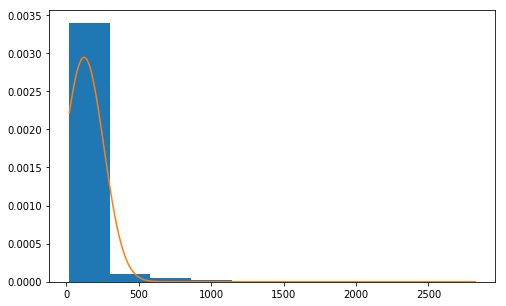

In [28]:
import numpy  as np
from scipy import stats
from matplotlib import pyplot

fig, axs= pyplot.subplots(1, 1, figsize=(8, 5), sharey=False)
pyplot.hist(y.price.values, density=True)
w = np.arange(np.min(y.price.values), np.max(y.price.values), 0.001)
pyplot.plot(w, stats.norm.pdf(w, np.mean(y.price.values),np.std(y.price.values)), label = 'N(0,1)') # N(0,1)
pyplot.show()

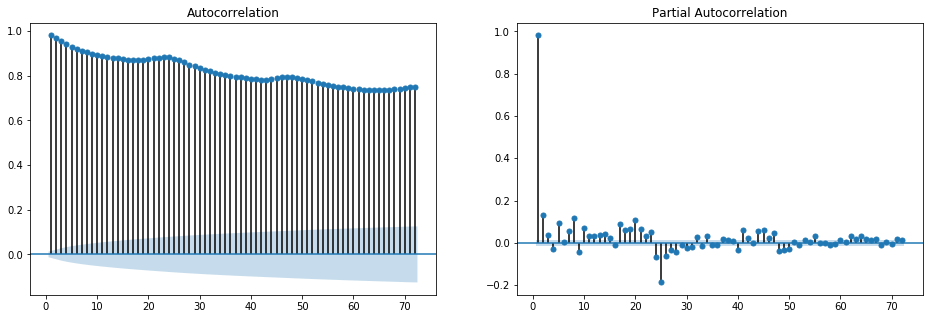

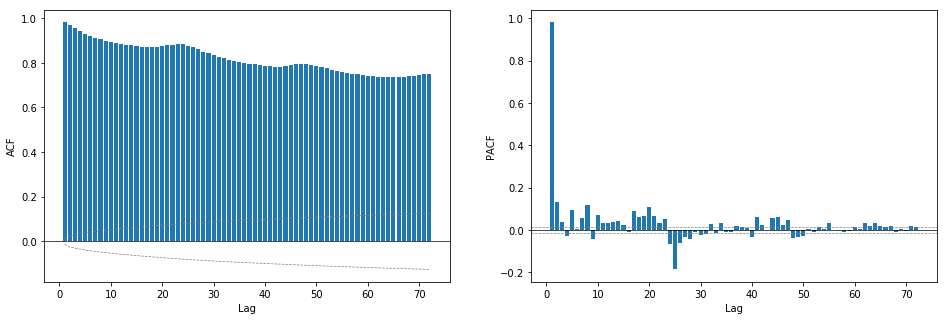

In [17]:
from statsmodels.tsa.stattools import acovf, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot

k=72 # lags

acov = acovf(y.price, nlag=k, fft=False)            # Autocovariance function
acf  = acf(y.price, nlags=k, fft=False, alpha=None) # Autocorrelation function
pacf = pacf(y.price, nlags=k, alpha=None)           # Partial autocorrelation function

acf  = acf[1:]
pacf = pacf[1:]

fig, axs= pyplot.subplots(1, 2, figsize=(16, 5), sharey=False)
fig = plot_acf(y.price,  lags=k, ax=axs[0], zero = False)
fig = plot_pacf(y.price, lags=k, ax=axs[1], zero = False)
pyplot.show()

## Also
# ACF
sd=np.sqrt((np.cumsum(2*acf[0:]**2))/len(y.price))
sd[0]=np.sqrt(1/len(y.price))
sd = np.concatenate((-1.96*sd.reshape(sd.shape[0],1), 1.96*sd.reshape(sd.shape[0],1)), axis=1)

fig, axs = pyplot.subplots(1, 2, figsize=(16, 5), sharey=False)
axs[0].bar(np.linspace(1, len(acf), len(acf)), acf)
axs[0].axhline(0, linestyle='-', color='k',  linewidth=0.7)
axs[0].plot(np.linspace(1, len(acf), len(acf)), sd,  linestyle='--', color='gray',  linewidth=0.7)
axs[0].set_ylabel('ACF')
axs[0].set_xlabel('Lag')

# PACF
axs[1].bar(np.linspace(1, len(pacf), len(pacf)), pacf)
axs[1].axhline(0, linestyle='-', color='k',  linewidth=0.7)
axs[1].axhline(2/np.sqrt(len(y.price)),  linestyle='--', color='gray',  linewidth=0.7)
axs[1].axhline(-2/np.sqrt(len(y.price)), linestyle='--', color='gray',  linewidth=0.7)
axs[1].set_ylabel('PACF')
axs[1].set_xlabel('Lag')
pyplot.show()


### ADF unit root test

In [18]:
from statsmodels.tsa.stattools import adfuller

adf_ur = adfuller(y.price, maxlag=None, regression='nc', autolag='BIC') # regression{'c','ct','ctt','nc'}

print('ADF Test Results:\n')
print('Test statistic: %.3f' %  adf_ur[0])
print('p-value: %.3f' %  adf_ur[1])
print('Used lags:', adf_ur[2])
print('Critical Values:')
for j, q in adf_ur[4].items():
    print('\t%s: %.3f' % (j, q))

ADF Test Results:

Test statistic: -4.174
p-value: 0.000
Used lags: 48
Critical Values:
	1%: -2.566
	5%: -1.941
	10%: -1.617


**Warning**: Althouh the ADF test rejects the unit root null hypothesis, this does not appears to be consistent with the conclusion from the visual inspection of the ACF. Indeed, the power of the ADF test is disminished by the presence of seasonal components. In particular, when a unit root null is rejected, it is not clear whether the rejection is due to the absence of a unit root or the presence of seasonality (Ghysels and
Perron, 1993). For this, there are unit root test for regular and seasonal time series (at quarterly and monthly frequencies even hourly) althought these are not available in Python.

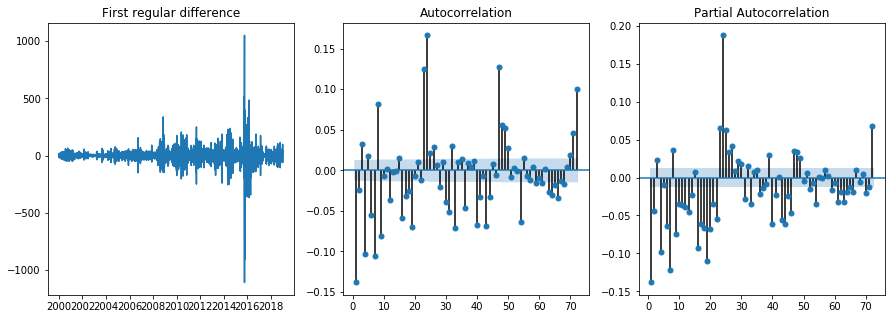

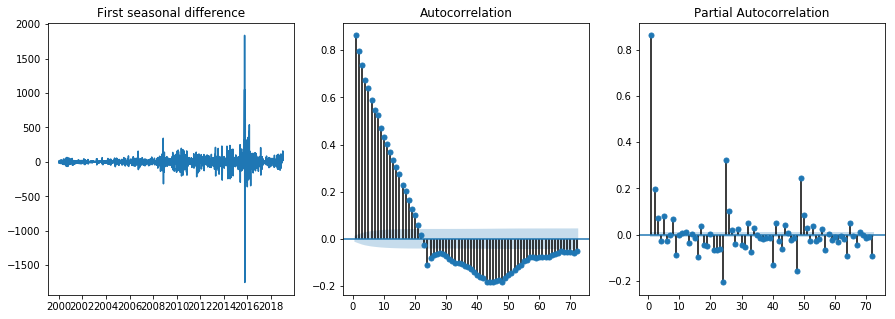

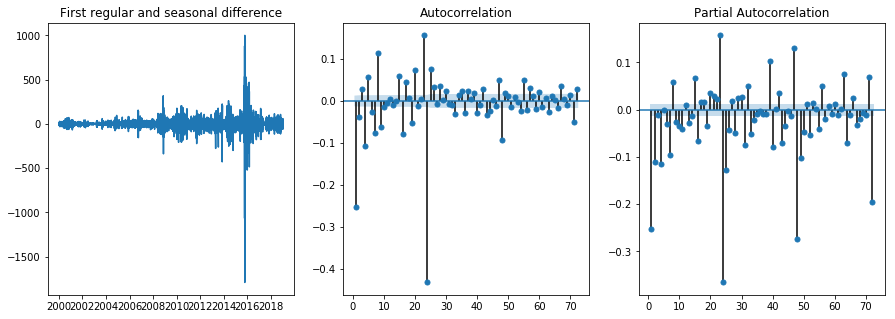

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.tools import diff

# First difference of X_t
dy = diff(y.price, k_diff=1, k_seasonal_diff=None, seasonal_periods=1)

k=72 # lags
fig, axs= pyplot.subplots(1, 3, figsize=(15, 5), sharey=False)
axs[0].plot(dy)
#axs[0].set_ylabel(r'$\Delta Y_t$')
#axs[0].set_xlabel(r'$t$')
axs[0].set_title('First regular difference')
fig = plot_acf(dy,  lags=k, ax=axs[1], zero = False)
fig = plot_pacf(dy, lags=k, ax=axs[2], zero = False)
pyplot.show()

# Seasonal difference of X_t
Dy = diff(y.price, k_diff=0, k_seasonal_diff=1, seasonal_periods=24)

k=72 # lags
fig, axs= pyplot.subplots(1, 3, figsize=(15, 5), sharey=False)
axs[0].plot(Dy)
#axs[0].set_ylabel(r'$\Delta Y_t$')
#axs[0].set_xlabel(r'$t$')
axs[0].set_title('First seasonal difference')
fig = plot_acf(Dy,  lags=k, ax=axs[1], zero = False)
fig = plot_pacf(Dy, lags=k, ax=axs[2], zero = False)
pyplot.show()


# Regular and seasonal difference of X_t
dDy = diff(y.price, k_diff=1, k_seasonal_diff=1, seasonal_periods=24)

k=72 # lags
fig, axs= pyplot.subplots(1, 3, figsize=(15, 5), sharey=False)
axs[0].plot(dDy)
#axs[0].set_ylabel(r'$\Delta Y_t$')
#axs[0].set_xlabel(r'$t$')
axs[0].set_title('First regular and seasonal difference')
fig = plot_acf(dDy,  lags=k, ax=axs[1], zero = False)
fig = plot_pacf(dDy, lags=k, ax=axs[2], zero = False)
pyplot.show()



In [20]:
from statsmodels.tsa.stattools import arma_order_select_ic

#print(arma_order_select_ic(y.price, max_ar=5, max_ma=3, ic='bic', trend='nc'))
#print(arma_order_select_ic(y.price, max_ar=5, max_ma=3, ic='aic', trend='nc'))

print(arma_order_select_ic(dDy, max_ar=5, max_ma=3, ic='bic', trend='nc'))
#print(arma_order_select_ic(dDy, max_ar=5, max_ma=3, ic='aic', trend='nc'))


{'bic':                0              1              2              3
0            NaN  233195.569538  233132.058656  233126.612176
1  233494.912132            NaN            NaN            NaN
2  233211.837483            NaN            NaN            NaN
3  233219.177911            NaN            NaN            NaN
4  232909.631676            NaN            NaN            NaN
5  232919.646125            NaN            NaN            NaN, 'bic_min_order': (4, 0)}


### Estimation

In [21]:
import numpy as np
from statsmodels.tsa.arima_model   import ARIMA, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic  import acorr_ljungbox

from matplotlib import pyplot

model = ARIMA(y.price, order=(1,0,1)).fit(trend = 'nc')    # trend = {'c','nc'}
print(model.summary())
print('AIC: %.3f' % model.aic, '\nBIC: %.3f' % model.bic, '\nHQIC: %.3f' % model.hqic, '\nlogL: %.3f' % model.llf)


/home/user/.conda/envs/p37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


MemoryError: 

In [ ]:
y.price_f = model.predict() #start=1, end=len(y.price)) # typ={'levels', 'linear'}
y.price_f.index = y.price.index

pyplot.plot(y.price, label='Observed')
pyplot.plot(y.price_f, label='Fitted', color='r')
#pyplot.xlabel(r'$t$')
pyplot.legend(loc='upper left')
pyplot.show()

### Diagnostics

In [23]:
from sklearn.neighbors import KernelDensity
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

k=48
# residuals
res = model.resid
res = res.values/np.std(res.values) # standardized residuals

fig, axs= pyplot.subplots(1, 3, figsize=(15, 4), sharey=False)
axs[0].plot(res)
#axs[0].set_ylabel(r'$\hat{\varepsilon}_t$')
#axs[0].set_xlabel(r'$t$')
axs[0].set_title('Standardized residuals')
fig = plot_acf(res,  lags=k, ax=axs[1], zero=False)
fig = plot_pacf(res, lags=k, ax=axs[2], zero=False)
pyplot.show()

# Ljung-Box and Box-Pierce Q Statistics
print('Test of No Serial Correlation\n',acorr_ljungbox(res, lags=k, boxpierce=True, return_df=True))


fig, axs= pyplot.subplots(2, 2, figsize=(12, 10), sharey=False)
axs[0,0].plot(res)
axs[0,0].axhline(0, linestyle='-', color='gray',  linewidth=0.7)
#axs[0,0].set_xlim(0,len(res))
#axs[0,0].set_ylabel(r'$\hat{\varepsilon}_t$')
axs[0,0].set_xlabel(r'$t$')
axs[0,0].set_title('Standardized residuals')

# ACF
fig = plot_acf(res,  lags=k, ax=axs[0,1], zero=False)
axs[0,1].set_xlabel(r'$k$')
axs[0,1].set_title('Autocorrelation function')

# Q-Q Plot
fig =  qqplot(res, line ='45', ax=axs[1,0])
#axs[1,0].set_ylim(-3,3.5)
#axs[1,0].set_xlim(-2.8,2.8)
axs[1,0].set_title('Normal QQ- plot')

# Histogram and density
res = res.reshape(res.shape[0],1)
res_d = np.linspace(res.min(), res.max(), 1000)[:, np.newaxis] # generate N points between the min() and max() of x
f_hat = KernelDensity(kernel='epanechnikov').fit(res) # fit the kernel density estimation on x
log_dens = f_hat.score_samples(res_d) # score_samples returns the log of the estimated probability density
axs[1,1].hist(res, density=True)                                                       # histogram
axs[1,1].plot(res_d, np.exp(log_dens), label = 'Kernel density')                       # kernel density
axs[1,1].plot(np.arange(np.min(res),np.max(res), 0.001), stats.norm.pdf(np.arange(np.min(res),np.max(res), 0.001), 0, 1),  label = 'N(0,1)') # N(0,1)
axs[1,1].set_xlim(np.min(res),np.max(res))
axs[1,1].set_xlabel(r'$\hat{\varepsilon}_t$')
axs[1,1].legend(loc='upper right')
axs[1,1].set_title('Histogram and density')
pyplot.show()

NameError: name 'model' is not defined

### Forecasting

In [ ]:
import numpy as np
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from sklearn.metrics import mean_squared_error

x = y.price
h = 24         # h-step ahead horizont
n = len(x) - h # number of train observations
train, test = x[0:n], x[n:len(x)]

history = [x for x in train]
forecasts = list()
#ci = list()
for t in range(h):
    model = ARIMA(history, order=(1,1,1)).fit(trend = 'nc') # training
    output = model.forecast()
    x_f = output[0]  # forecasts
#    ci_f = output[2] # forecast confidence interval
    forecasts.append(x_f)
#    ci.append(ci_f)
    obs = test[t]
    history.append(obs)
    print('Expected = %f, Forecasted = %f'  % (obs, x_f))

print('MSE: %.3f, RMSE: %.3f' % (mean_squared_error(test, forecasts), np.sqrt(mean_squared_error(test, forecasts))))


In [ ]:
forecasts = pd.Series(forecasts)
forecasts.index = test.index

#pyplot.plot(test.values, label='Expected')
pyplot.plot(y.price[(23808-25):23807].values, label='Expected')
pyplot.plot(forecasts.values, label='Forecasted')
pyplot.legend()
pyplot.show()

### Seasonal Time Series Models

* The multiplicative seasonal ARIMA process, $\mathrm{ARIMA}(p,d,q)\times(P,D,Q)_s$, given by

$$
\Phi_{P}(B^s)\phi_{p}(B)(1-B)^d(1-B^s)^DX_{t}=\theta_{q}(B)\Theta_{Q}(B^s)\varepsilon_{t},
$$

where $s$ is the **_seasonal period_**,

$$
\phi_{p}(z)=1-\phi_{1}z-\cdots-\phi_{p}z^{p},
$$
and
$$
\theta_{q}(z)=1+\theta_{1}z+\cdots+\theta_{q}z^{q},
$$

are the _**ordinary**_ autoregressive and moving-average polynomials, and

$$
\Phi_{P}(z^s)=1-\Phi_{1}z^s-\cdots-\Phi_{P}z^{Ps},
$$
and
$$
\Theta_{Q}(z^s)=1+\Theta_{1}z^s+\cdots+\Theta_{Q}z^{Qs},
$$

are the _**seasonal**_ autoregressive and moving-average polynomials.

* The **_stochastic trend seasonality_** is taken into account by **_seasonal differencing_**,
$$
\Delta_s^DX_t=(1-B^s)^DX_t,\quad D\in\mathbb{N}.
$$

    * For quarterly data, $s=4$, i.e. $\Delta^4X_t=X_t-X_{t-4}$
    * For monthly data, $s=12$, i.e. $\Delta^{12}X_t=X_t-X_{t-12}$
    * For hourly data, $s=24$, i.e. $\Delta^{24}X_t=X_t-X_{t-24}$


* See https://www.statsmodels.org/stable/statespace.html#models-and-estimation

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(y.price, order=(1, 1, 0), seasonal_order=(1, 1, 0, 24), trend='n').fit()
print(model.summary())
print('AIC: %.3f' % model.aic, '\nBIC: %.3f' % model.bic, '\nHQIC: %.3f' % model.hqic, '\nlogL: %.3f' % model.llf)


In [ ]:
y.price_f = model.predict()

pyplot.plot(y.price, label='Observed')
pyplot.plot(y.price_f, label='Fitted', color='r')
pyplot.legend(loc='upper left')
pyplot.show()

### Diagnostics

In [ ]:
from sklearn.neighbors import KernelDensity
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

k=48
# residuals
res = model.resid
res = res.values/np.std(res.values) # standardized residuals

fig, axs= pyplot.subplots(1, 3, figsize=(15, 4), sharey=False)
axs[0].plot(res)
#axs[0].set_ylabel(r'$\hat{\varepsilon}_t$')
#axs[0].set_xlabel(r'$t$')
axs[0].set_title('Standardized residuals')
fig = plot_acf(res,  lags=k, ax=axs[1], zero=False)
fig = plot_pacf(res, lags=k, ax=axs[2], zero=False)
pyplot.show()

# Ljung-Box and Box-Pierce Q Statistics
print('Test of No Serial Correlation\n',acorr_ljungbox(res, lags=k, boxpierce=True, return_df=True))


fig, axs= pyplot.subplots(2, 2, figsize=(12, 10), sharey=False)
axs[0,0].plot(res)
axs[0,0].axhline(0, linestyle='-', color='gray',  linewidth=0.7)
#axs[0,0].set_xlim(0,len(res))
#axs[0,0].set_ylabel(r'$\hat{\varepsilon}_t$')
axs[0,0].set_xlabel(r'$t$')
axs[0,0].set_title('Standardized residuals')

# ACF
fig = plot_acf(res,  lags=k, ax=axs[0,1], zero=False)
axs[0,1].set_xlabel(r'$k$')
axs[0,1].set_title('Autocorrelation function')

# Q-Q Plot
fig =  qqplot(res, line ='45', ax=axs[1,0])
#axs[1,0].set_ylim(-3,3.5)
#axs[1,0].set_xlim(-2.8,2.8)
axs[1,0].set_title('Normal QQ- plot')

# Histogram and density
res = res.reshape(res.shape[0],1)
res_d = np.linspace(res.min(), res.max(), 1000)[:, np.newaxis] # generate N points between the min() and max() of x
f_hat = KernelDensity(kernel='epanechnikov').fit(res) # fit the kernel density estimation on x
log_dens = f_hat.score_samples(res_d) # score_samples returns the log of the estimated probability density
axs[1,1].hist(res, density=True)                                                       # histogram
axs[1,1].plot(res_d, np.exp(log_dens), label = 'Kernel density')                       # kernel density
axs[1,1].plot(np.arange(np.min(res),np.max(res), 0.001), stats.norm.pdf(np.arange(np.min(res),np.max(res), 0.001), 0, 1),  label = 'N(0,1)') # N(0,1)
axs[1,1].set_xlim(np.min(res),np.max(res))
axs[1,1].set_xlabel(r'$\hat{\varepsilon}_t$')
axs[1,1].legend(loc='upper right')
axs[1,1].set_title('Histogram and density')
pyplot.show()

### Forecasting

In [ ]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
from sklearn.metrics import mean_squared_error

x = y.price
h = 24         # h-step ahead horizont
n = len(x) - h # number of train observations
train, test = x[0:n], x[n:len(x)]

history = [x for x in train]
forecasts = list()
#ci = list()
for t in range(h):
    model = SARIMAX(history, order=(1, 1, 0), seasonal_order=(1, 1, 0, 24), trend='n').fit() # training
    x_f = model.forecast()
#    ci_f = output[2] # forecast confidence interval
    forecasts.append(x_f)
#    ci.append(ci_f)
    obs = test[t]
    history.append(obs)
    print('Expected = %f, Forecasted = %f'  % (obs, x_f))

print('MSE: %.3f, RMSE: %.3f' % (mean_squared_error(test, forecasts), np.sqrt(mean_squared_error(test, forecasts))))


In [ ]:
forecasts = pd.Series(forecasts)
forecasts.index = test.index

#pyplot.plot(test.values, label='Expected')
pyplot.plot(y.price[(23808-25):23807].values, label='Expected')
pyplot.plot(forecasts.values, label='Forecasted')
pyplot.legend()
pyplot.show()

**Homework**: apply the Box-Cox power transformation to the hourly electricity spot price, and estimate and forecasting it by using the SARIMA model.